In [2]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_excel('data_dump.xlsx')

In [4]:
data.head()

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
0,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product
1,July,2023-07-01,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN
2,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN


C:\Users\admin\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

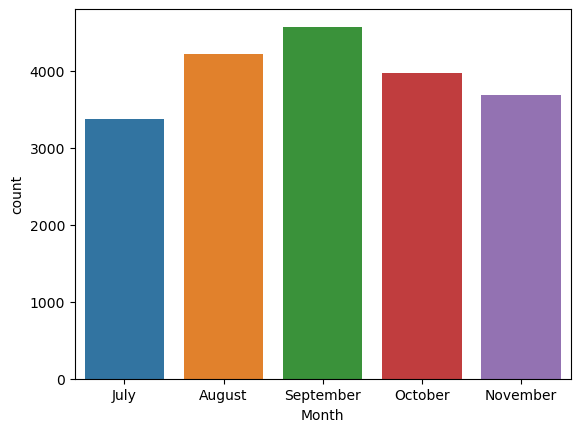

In [5]:
sns.countplot(data['Month'])

What is the quantum month on month from July to November?


<AxesSubplot:xlabel='Month', ylabel='Count'>

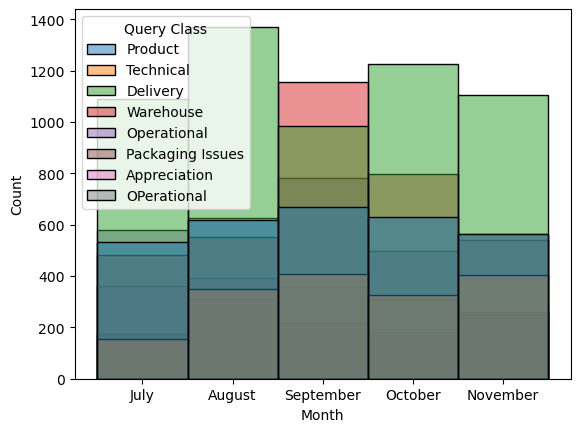

In [10]:
'''sns.histplot(binwidth=1,
            x=first_dimension,
            hue=second_dimension,
            data=df,
            stat="count",
            multiple="dodge")'''
sns.histplot(binwidth=1,x=data['Month'],hue=data['Query Class'],data=data,stat="count")

What is the quantum of complaints excluding Appreciation?


In [11]:
data.head()

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks
0,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product
1,July,2023-07-01,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN
2,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN


In [24]:
# heare i need to create first duplicate column
# after from their remove "Appreciation"
data['dup_query_class']=data['Query Category']

In [25]:
data.head()

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks,dup_query_class
0,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Disliked the product,Dissatisfied
1,July,2023-07-01,Inbound - CRM,Emails,Technical,Coupon application error,NaN,NaN,NaN,Coupon application error
2,July,2023-07-01,Inbound - Social,Facebook,Product,Dissatisfied,NaN,NaN,Darkened skin tone,Dissatisfied
3,July,2023-07-01,Inbound - CRM,Emails,Delivery,Marked Delivered but not Received,NaN,NaN,NaN,Marked Delivered but not Received
4,July,2023-07-01,Inbound - CRM,Calls,Delivery,Hub Address Request,NaN,NaN,NaN,Hub Address Request


In [26]:
data.drop(data.index[(data['dup_query_class']=='Appreciation')],axis=0,inplace=True)

In [27]:
data['dup_query_class'].unique()

array(['Dissatisfied', 'Coupon application error',
       'Marked Delivered but not Received', 'Hub Address Request',
       'Delayed Order', 'Fake Update/Order RTO',
       'Freebie not added in the cart', 'Products Missing',
       'Expired/Near To Expiry Products',
       'Notification Mails/Message not received',
       'Wrong Product Dispatched', 'Wrong Order Delivery',
       'Amount deducted order not placed', 'Product Spillage',
       'Reacted - Skin Irritation/Rashes', 'Broken Product',
       'Lost/Destroyed/Damaged Order', 'Packaging Issues',
       'Reversed After Effects', 'Price High', 'Delivery Boy Complaint',
       'Product Not Effective', 'App not Working/Login Issue',
       'Fragrance', 'Product Not Sealed', 'Gift Kit Complaints',
       'Change in smell/texture/colour/consistency',
       'Website not working/Login Issue', 'Bad Smell', 'Damaged',
       'Reacted - Acne/Pimples', 'Texture',
       'Product & Packaging Mismatch', 'Unsubscription',
       'Order Misr

In [47]:
complaints_df =data[~data['dup_query_class'].str.contains('Appreciation', na=False)]


In [48]:
complaints_by_month = complaints_df.groupby('Month').size()


<AxesSubplot:xlabel='Month'>

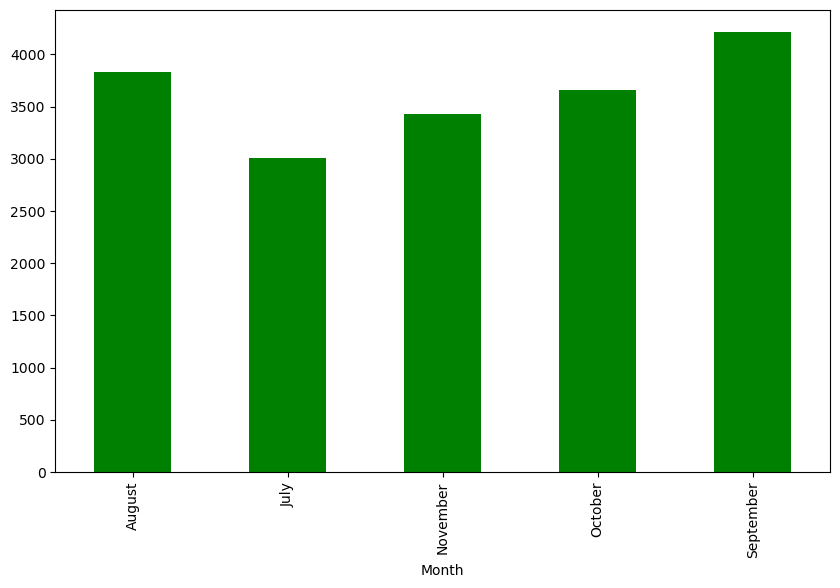

In [53]:
plt.figure(figsize=(10, 6))
complaints_by_month.plot(kind='bar', color='green')


What is the quantum of delivery complaints (MOM) from July to November?


In [55]:
delivery_complaints_df = data.loc[(data['Query Class'] == 'Delivery')]

In [57]:
delivery_complaints_df
complained_by_mom=delivery_complaints_df.groupby(data['Month']).size()

In [59]:
mom_complain=complained_by_mom.diff()

<AxesSubplot:xlabel='Month'>

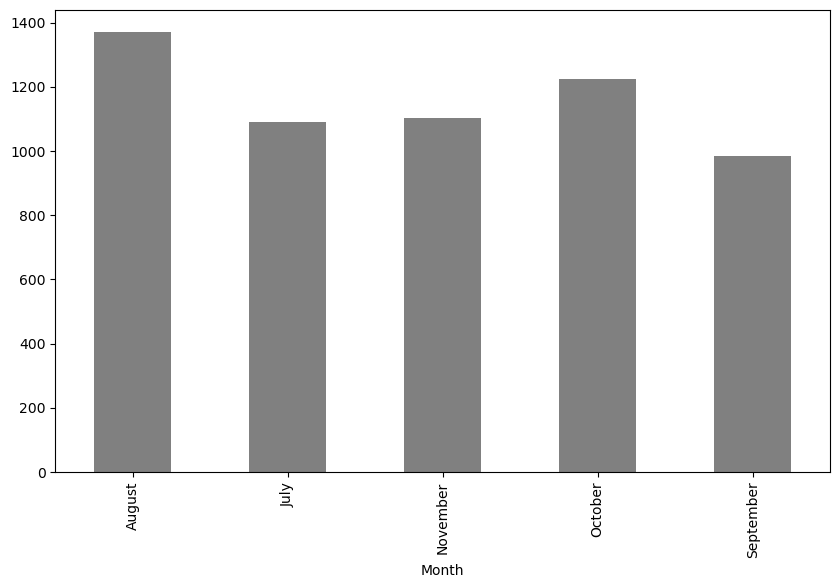

In [92]:
plt.figure(figsize=(10,6))
complained_by_mom.plot(kind='bar',color='gray')

Which product has highest complaint from Batch - B002?


In [70]:
batch_b002=data.loc[(data['Batch Number/Fcailities']=='B002')]

In [71]:
batch_b002

,Month,Ticket Date,Final - Class,Source,Query Class,Query Category,Product Name,Batch Number/Fcailities,Remarks,dup_query_class
936,July,2023-07-13,Inbound - CRM,Calls,Operational,Damaged,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Tip,Damaged
942,July,2023-07-13,Inbound - CRM,Emails,Operational,Damaged,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Tip,Damaged
1385,July,2023-07-19,Inbound - CRM,Emails,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out,Packaging Issues
1443,July,2023-07-19,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick,Broken Product
1449,July,2023-07-19,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick,Broken Product
1497,July,2023-07-20,Inbound - CRM,Calls,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out,Packaging Issues
1551,July,2023-07-20,Inbound - CRM,Emails,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out,Packaging Issues
1552,July,2023-07-20,Inbound - CRM,Emails,Packaging Issues,Packaging Issues,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Lipstick Not Rolling Out,Packaging Issues
1584,July,2023-07-21,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick,Broken Product
1600,July,2023-07-21,Inbound - CRM,Calls,Operational,Broken Product,Cocoa Kiss Creamy Matte Lipstick-Blush Slush,B002,Broken Lipstick,Broken Product


In [72]:
complaints_by_product = batch_b002.groupby('Product Name').size()


In [77]:
highest_complain_product=complaints_by_product.idxmax()
highest_count=complaints_by_product.max()

<AxesSubplot:xlabel='Product Name'>

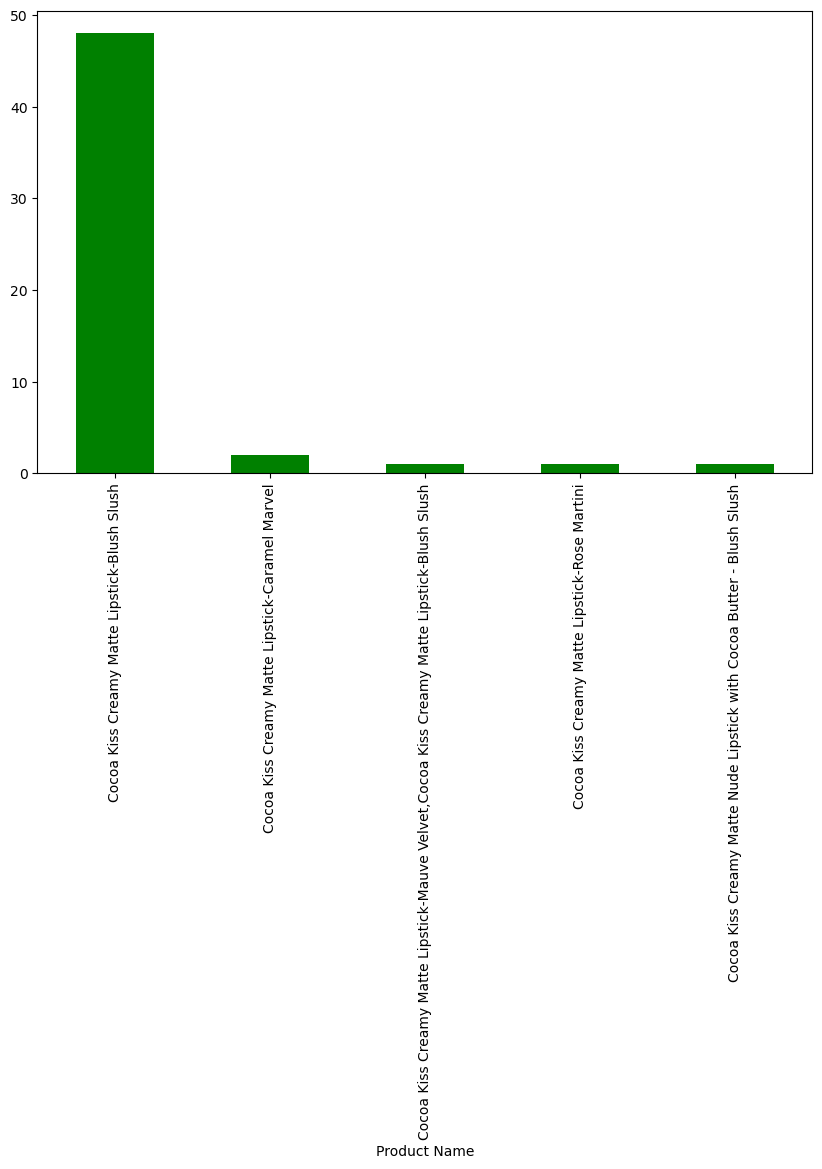

In [79]:
plt.figure(figsize=(10, 6))
complaints_by_product.plot(kind='bar', color='green')

What is the quantum of complaints we received for the Batch - B220462?


In [82]:
Batch_B220462=data.loc[(data['Batch Number/Fcailities']=='B220462')]

In [85]:
complain_by_month=Batch_B220462.groupby(data['Month']).size()

<AxesSubplot:xlabel='Month'>

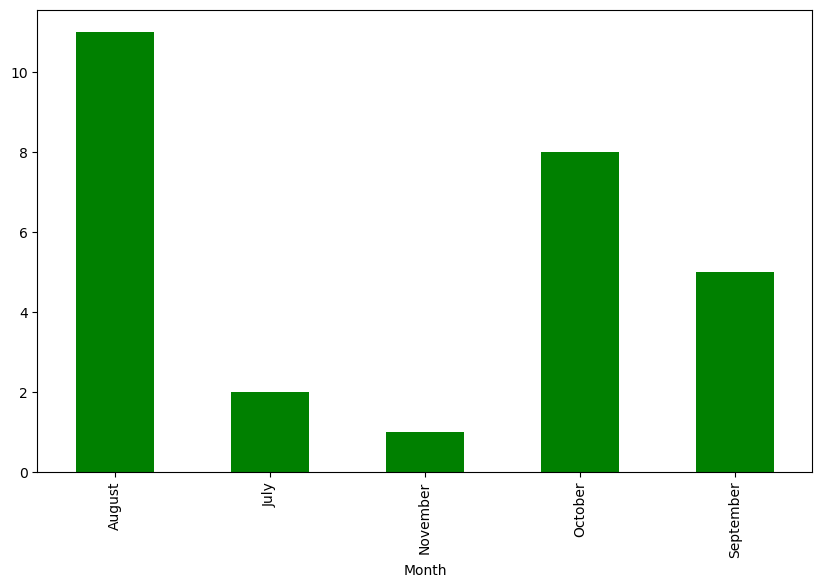

In [86]:
plt.figure(figsize=(10,6))
complain_by_month.plot(kind='bar',color='green')


What all are the Query Categories under Delivery Query Class and the quantum of each Query Category?


In [87]:
delivery_df = data[data['Query Class'] == 'Delivery']

In [88]:
query_category_counts = delivery_df['Query Category'].value_counts()

In [90]:
quantum_of_query_category=delivery_df.groupby(data['Month']).size()

<AxesSubplot:xlabel='Month'>

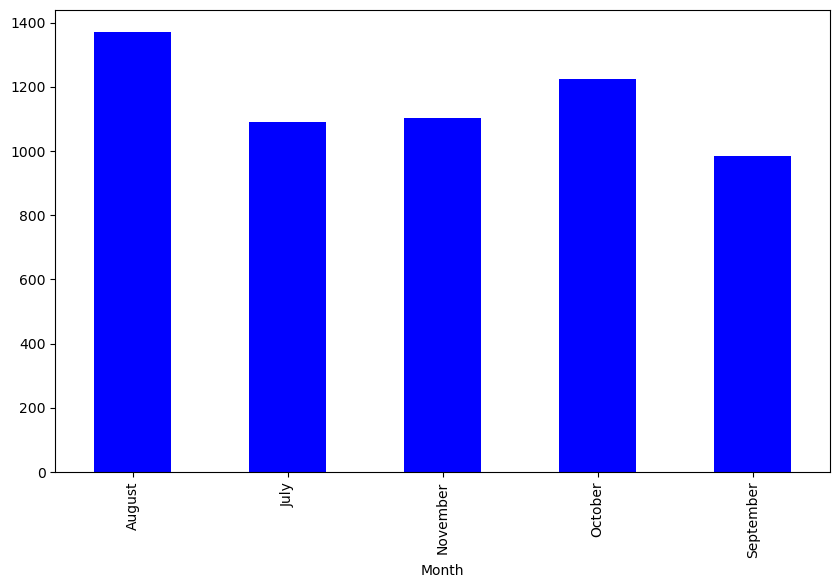

In [91]:
plt.figure(figsize=(10, 6))
quantum_of_query_category.plot(kind='bar', color='blue')

Which Final-Class has the highest complaints?


In [93]:
complained_by_mom=delivery_complaints_df.groupby(data['Final - Class']).size()

<AxesSubplot:xlabel='Final - Class'>

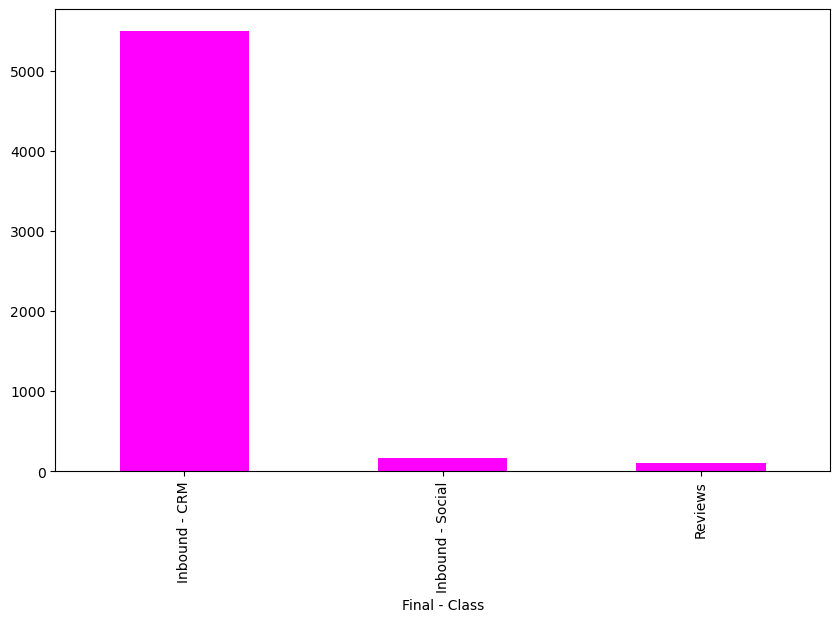

In [95]:
plt.figure(figsize=(10,6))
complained_by_mom.plot(kind='bar',color='magenta')